In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [62]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [63]:
# get the data
from sklearn.datasets import make_circles
n_samples = 10000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

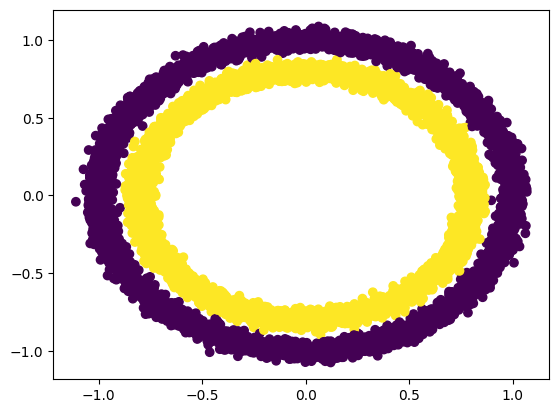

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [65]:
# Shape
X.shape, y.shape

((10000, 2), (10000,))

In [66]:
# length
len(X), len(y)

(10000, 10000)

In [67]:
# See what the data looks like
X[:5], y[:5]

(array([[ 0.0464692 ,  0.82477834],
        [ 1.00506323, -0.43335153],
        [-0.58348442,  0.79452834],
        [ 0.98478298, -0.32517879],
        [ 0.82993028, -0.54722305]]),
 array([1, 0, 0, 0, 0]))

In [68]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Set random seed
tf.random.set_seed(42)

# instantiate model object
model = tf.keras.Sequential()

# Hidden layers
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="relu"))

# Output Layer
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit
history = model.fit(X_train, y_train, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...


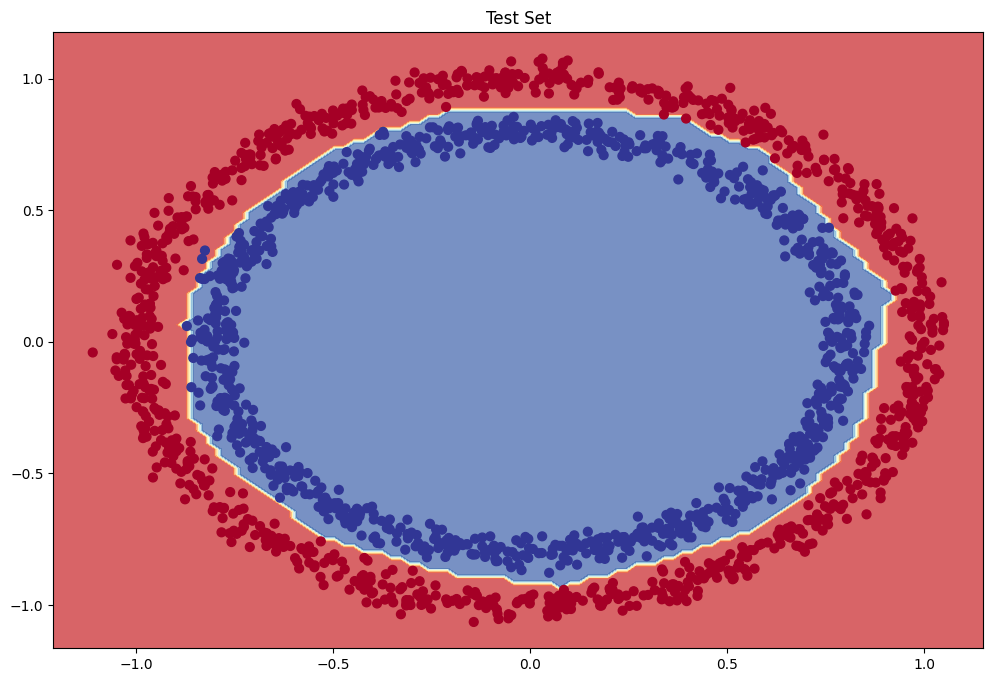

In [70]:
# View model decision boundary for test set
plt.figure(figsize=(12, 8))
plt.title("Test Set")
plot_decision_boundary(model, X_test, y_test)

In [71]:
# Evaluate
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0034


[0.01055065169930458, 0.9980000257492065]

Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [72]:
# Get the data
from sklearn.datasets import make_moons
n_samples = 10000

X, y = make_moons(n_samples=n_samples, noise=0.03, random_state=42)

In [73]:
X, X.shape

(array([[ 0.3423736 , -0.18332506],
        [-0.89759408,  0.15006114],
        [ 0.44922107,  0.8573337 ],
        ...,
        [ 0.00951042,  0.25376962],
        [ 0.86117045,  0.51716097],
        [ 0.94867901, -0.45668393]]),
 (10000, 2))

In [74]:
y, y.shape

(array([1, 0, 0, ..., 1, 0, 1]), (10000,))

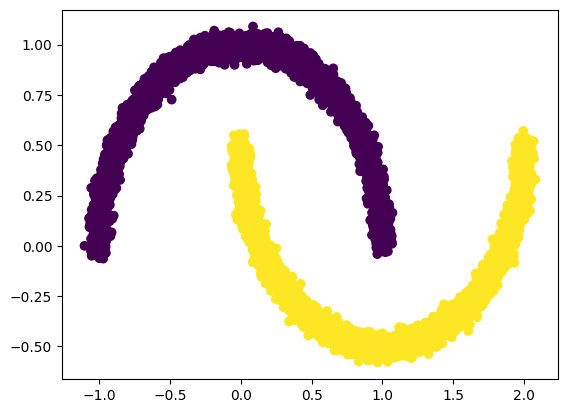

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [76]:
# Split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [77]:
# Moon model 1

# Random state
tf.random.set_seed(42)

# Instantiate model object
moon_model = tf.keras.Sequential()

# Input layer
moon_model.add(tf.keras.layers.Input(shape=(2,)))

# Hidden layers
moon_model.add(tf.keras.layers.Dense(10, activation="relu"))
moon_model.add(tf.keras.layers.Dense(10, activation="relu"))

# Output layer
moon_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile
moon_model.compile(loss=tf.keras.losses.binary_crossentropy,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])

history = moon_model.fit(X_train, y_train, epochs=13)

Epoch 1/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6680 - loss: 0.5656
Epoch 2/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3079
Epoch 3/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8832 - loss: 0.2348
Epoch 4/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8868 - loss: 0.2106
Epoch 5/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.1942
Epoch 6/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.1788
Epoch 7/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9348 - loss: 0.1582
Epoch 8/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9495 - loss: 0.1349
Epoch 9/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9663 - loss: 0.1076
Epoch 10/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9816 - loss: 0.0784
Epoch 11/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9918 - loss: 0.0532
Epoch 12/13
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Text(0.5, 0, 'Epochs')

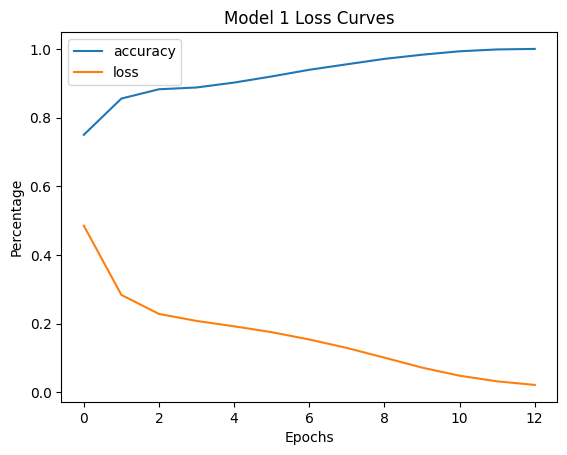

In [79]:
# Plot loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curves")
plt.ylabel("Percentage")
plt.xlabel("Epochs")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


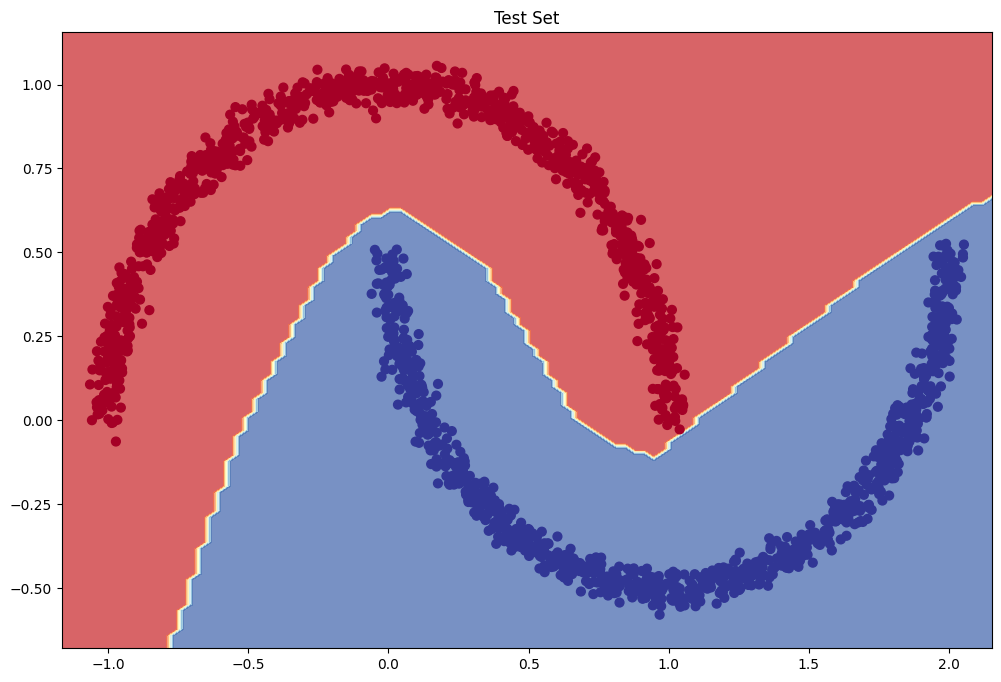

In [80]:
# Show decision boundary
plt.figure(figsize=(12, 8))
plt.title("Test Set")
plot_decision_boundary(moon_model, X_test, y_test)

In [81]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = moon_model.predict(X_test)
y_preds = np.round(y_preds)
confusion_matrix(y_test, y_preds)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1013,    0],
       [   0,  987]])

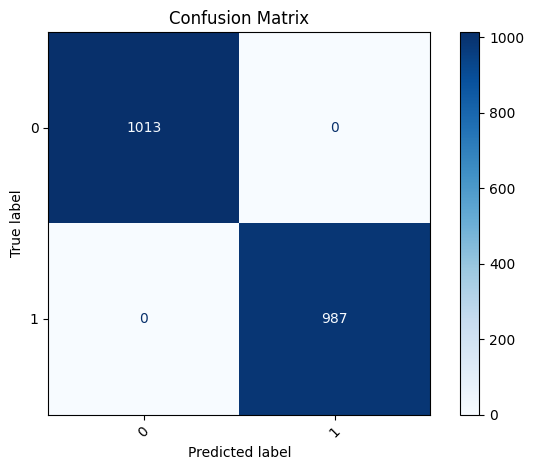

In [83]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)

# Create the display object with the computed confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot with customization
disp.plot(cmap='Blues',  # Color scheme
          values_format='d',  # Use 'd' for integers, '.2%' for percentages
          colorbar=True,  # Show colorbar
          xticks_rotation=45)  # Rotate x-axis labels

plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7519 - loss: 0.7525 - val_accuracy: 0.8344 - val_loss: 0.4668
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8521 - loss: 0.4278 - val_accuracy: 0.8485 - val_loss: 0.4236
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8658 - loss: 0.3828 - val_accuracy: 0.8557 - val_loss: 0.3999
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8742 - loss: 0.3554 - val_accuracy: 0.8592 - val_loss: 0.3863
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8808 - loss: 0.3359 - val_accuracy: 0.8641 - val_loss: 0.3750
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8856 - loss: 0.3202 - val_accuracy: 0.8681 - val_loss: 0.3675
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8900 - loss: 0.3077 - val_accuracy: 0.8709 - val_loss: 0.3607
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8935 - loss: 0.2968 -

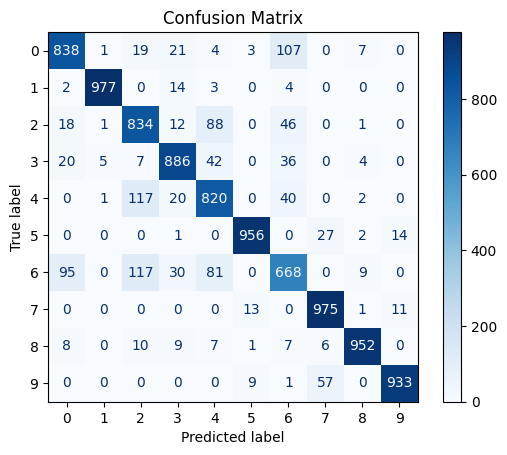

In [102]:
# prompt: import the fashion_mnist dataset

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input
    keras.layers.Dense(128, activation='relu'), # hidden
    keras.layers.Dense(10, activation='softmax') # output
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000282),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Train the model
# history = model.fit(X_train, y_train, epochs=10, callbacks=[lr_scheduler], validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.math.argmax(y_pred, axis=1)

# Create confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

<Axes: xlabel='epochs'>

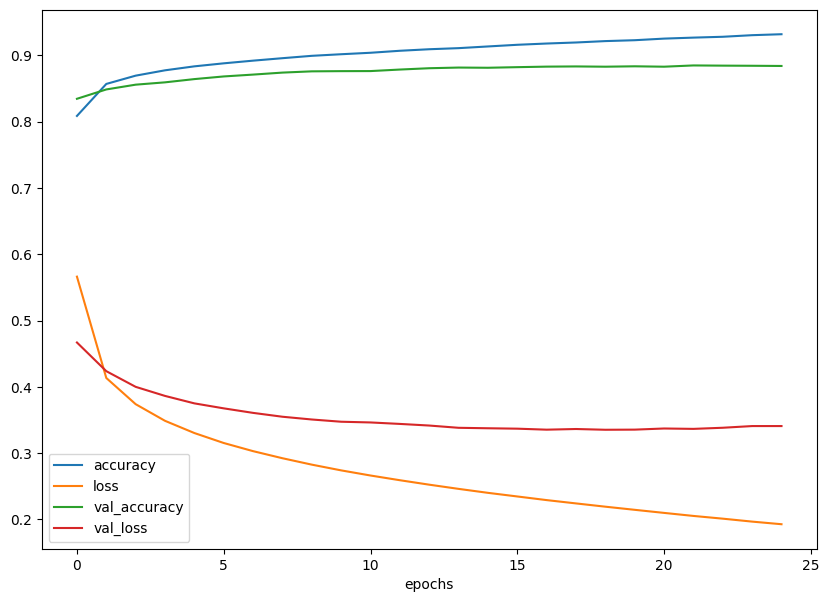

In [103]:
# Checkout the history - determine learning rate to use
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

In [95]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.771117,0.710036,0.8241,0.530789,0.000100
1,0.839600,0.472110,0.8388,0.469342,0.000112
2,0.854583,0.425542,0.8488,0.439588,0.000126
3,0.862717,0.398051,0.8536,0.420392,0.000141
4,0.869333,0.377887,0.8564,0.406554,0.000158
5,0.873767,0.361473,0.8592,0.395536,0.000178
6,0.878283,0.347378,0.8628,0.385813,0.000200
7,0.882050,0.334991,0.8657,0.377934,0.000224
8,0.885600,0.324025,0.8667,0.373333,0.000251
9,0.888333,0.314244,0.8673,0.371542,0.000282


Text(0.5, 1.0, 'Learning rate vs. loss')

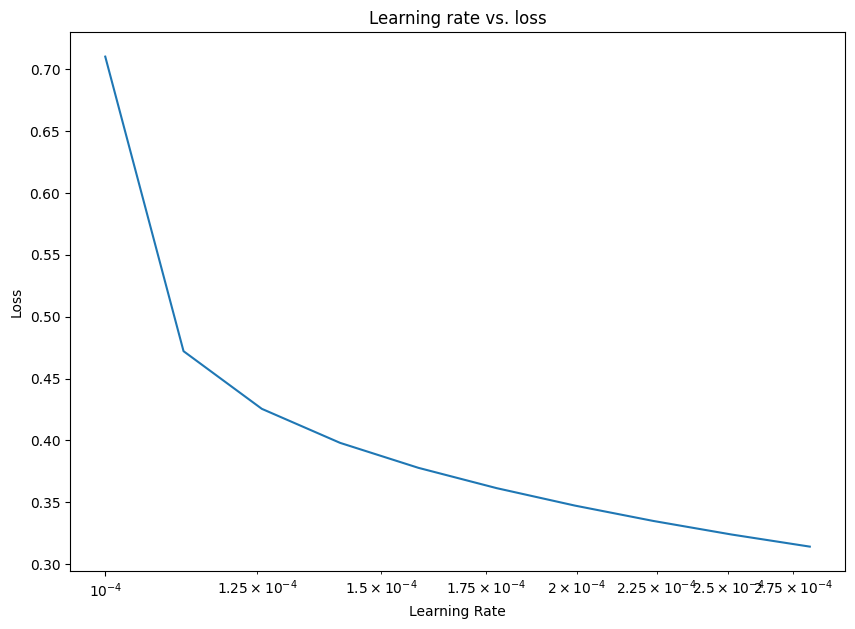

In [100]:
# Plot the learning rate versus the loss
# lrs = 1e-4 * (10 ** (np.arange(10)/20))
# plt.figure(figsize=(10, 7))
# plt.semilogx(lrs, history_df["loss"]) # we want the x-axis (learning rate) to be log scale
# plt.xlabel("Learning Rate")
# plt.ylabel("Loss")
# plt.title("Learning rate vs. loss")

In [112]:
# the categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [108]:
# Predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [116]:
# Show prediction for first
cat = np.argmax(predictions[0])
class_names[cat]

'Ankle boot'

In [117]:
def plot_image(i, predictions_array, true_label, img):
    """
    Plot a single image with its predicted and true labels.

    Parameters:
    -----------
    i : int
        Index of the image to plot
    predictions_array : numpy.ndarray
        Array of prediction probabilities for each class
    true_label : numpy.ndarray
        Array of true labels
    img : numpy.ndarray
        Array of images

    Description:
    ------------
    The function displays the image with a color-coded label below:
    - Blue: Correct prediction
    - Red: Incorrect prediction
    The label shows the predicted class, confidence percentage, and true class.

    Dependencies:
    ------------
    - matplotlib.pyplot
    - numpy
    - class_names (global variable): List of class names for labels
    """
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    """
    Plot a bar chart showing prediction probabilities for all classes.

    Parameters:
    -----------
    i : int
        Index of the prediction to plot
    predictions_array : numpy.ndarray
        Array of prediction probabilities for each class
    true_label : numpy.ndarray
        Array of true labels

    Description:
    ------------
    Creates a bar chart where:
    - Each bar represents the model's confidence for each class (0-9)
    - Blue bar: True label
    - Red bar: Predicted label
    - Gray bars: Other classes
    Y-axis ranges from 0 to 1, representing probability
    X-axis shows class indices (0-9)

    Dependencies:
    ------------
    - matplotlib.pyplot
    - numpy
    """
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_multiple_images_and_predictions(num_rows, num_cols):
  # Plot the first X test images, their predicted labels, and the true labels.
  # Color correct predictions in blue and incorrect predictions in red.
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
  plt.tight_layout()
  plt.show()

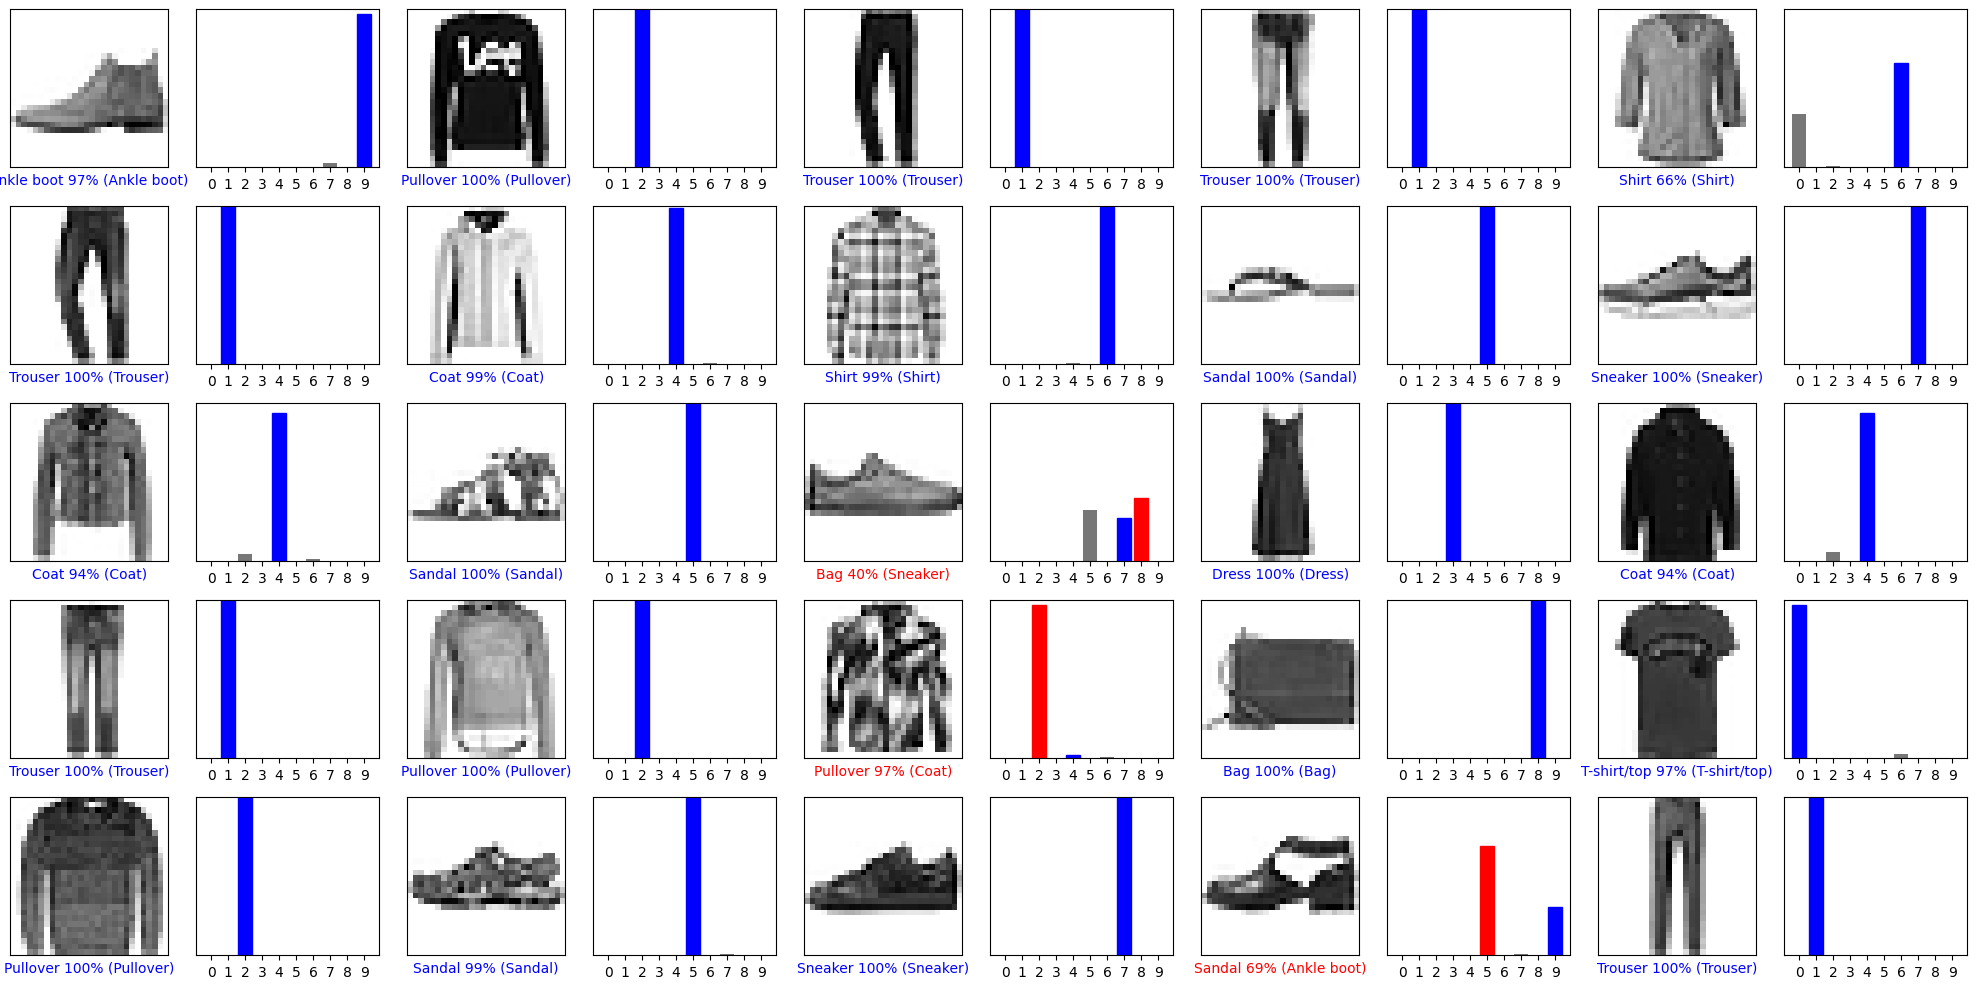

In [118]:
# Show some images and their predictions!
plot_multiple_images_and_predictions(5, 5)